In [1]:
import glob
import json
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns

#### Data reading

In [2]:
# For this analysis, we will need all tweets in a single dataframe.
df = pd.concat([
    pd.read_csv("../../output/mvp/5.merged_dataframes/keywords.csv", sep="|"),
    pd.read_csv("../../output/mvp/5.merged_dataframes/no-keywords.csv", sep="|")
])

#### Data preparation

In [3]:
# Keeping relevant columns
df = df.drop(columns=[
    "Unnamed: 0", "url", "date_str", "date", "7_days_before", "7_days_after"
], axis=1)

In [4]:
# Converts a string column to an actual pandas datetime series
df['datetime'] = pd.to_datetime(df.datetime)

In [5]:
# Sets the datetime as the index
df = df.set_index(df.datetime)

In [6]:
df.head()

,raw_content,tweet_id,user,conversation_id,like_count,reply_count,quote_count,retweet_count,datetime,week_id,total_engagement,percentile_for_total_engagement,has_protest_keywords,has_climate_keywords,has_both_keywords,protest_tokens,climate_tokens,classification
datetime,,,,,,,,,,,,,,,,,,
2020-08-11 13:21:46+00:00,Thousands of residents and environmental activ...,1293175777966555138,BreakingNews,1293175777966555138,61,4,2,37,2020-08-11 13:21:46+00:00,2020_33,104,86.0,True,True,True,['activist'],['environment'],fp
2019-10-30 14:51:50+00:00,Chilean government will no longer host UN clim...,1189555515422072834,BreakingNews,1189555515422072834,708,44,67,439,2019-10-30 14:51:50+00:00,2019_44,1258,0.0,True,True,True,['protest'],['climate change'],fp
2023-01-31 13:40:00+00:00,Dubai state-owned airline Emirates operated it...,1620416609280983042,Reuters,1620416609280983042,86,6,0,9,2023-01-31 13:40:00+00:00,2023_5,101,17.0,True,True,True,['demonstration'],['carbon emissions'],fp
2023-01-29 17:55:12+00:00,Environmentalists protest airport project near...,1619756058611679232,Reuters,1619756058611679232,76,10,0,23,2023-01-29 17:55:12+00:00,2023_4,109,15.0,True,True,True,['protest'],['environment'],nd
2023-01-29 14:54:13+00:00,Environmentalists protested at the building si...,1619710513927131138,Reuters,1619710513927131138,36,5,0,17,2023-01-29 14:54:13+00:00,2023_4,58,41.0,True,True,True,['protest'],['environment'],nd


#### Questions

In each week, how many climate tweets were posted, relative to total tweets?

In [7]:
# Total tweets by week
weekly_tweets = df.resample("W").tweet_id.count().rename("total_tweets")
display(weekly_tweets)

datetime
2018-08-26 00:00:00+00:00    20292
2018-09-02 00:00:00+00:00    19433
2018-09-09 00:00:00+00:00    20098
2018-09-16 00:00:00+00:00    20933
2018-09-23 00:00:00+00:00    20600
                             ...  
2023-01-22 00:00:00+00:00    19700
2023-01-29 00:00:00+00:00    19676
2023-02-05 00:00:00+00:00    19584
2023-02-12 00:00:00+00:00    19453
2023-02-19 00:00:00+00:00    19414
Freq: W-SUN, Name: total_tweets, Length: 235, dtype: int64

In [8]:
# Total climate tweets by week
weekly_climate_tweets = df[~df.classification.isna() & (df.classification != 'fp')].resample("W").tweet_id.count().rename("total_climate_tweets")
display(weekly_climate_tweets)

datetime
2018-08-26 00:00:00+00:00     1
2018-09-02 00:00:00+00:00     0
2018-09-09 00:00:00+00:00     7
2018-09-16 00:00:00+00:00     2
2018-09-23 00:00:00+00:00     0
                             ..
2023-01-22 00:00:00+00:00    13
2023-01-29 00:00:00+00:00     7
2023-02-05 00:00:00+00:00     2
2023-02-12 00:00:00+00:00     1
2023-02-19 00:00:00+00:00     3
Freq: W-SUN, Name: total_climate_tweets, Length: 235, dtype: int64

In [9]:
# Climate tweets in the top 10% engagement levels by week.
weekly_high_engagement_climate_tweets = df[~df.classification.isna() &
                                           (df.classification != 'fp') & 
                                           (df.percentile_for_total_engagement <= 10)] \
                                        .resample("W").tweet_id.count().rename("high_engagement_climate_tweets")

display(weekly_high_engagement_climate_tweets)

datetime
2018-09-09 00:00:00+00:00    5
2018-09-16 00:00:00+00:00    0
2018-09-23 00:00:00+00:00    0
2018-09-30 00:00:00+00:00    0
2018-10-07 00:00:00+00:00    0
                            ..
2023-01-22 00:00:00+00:00    4
2023-01-29 00:00:00+00:00    1
2023-02-05 00:00:00+00:00    1
2023-02-12 00:00:00+00:00    0
2023-02-19 00:00:00+00:00    2
Freq: W-SUN, Name: high_engagement_climate_tweets, Length: 233, dtype: int64

In [10]:
# Join them all together
time_df = pd.concat([weekly_tweets, weekly_climate_tweets, weekly_high_engagement_climate_tweets], axis=1) \
    .fillna(0)

display(time_df)

,total_tweets,total_climate_tweets,high_engagement_climate_tweets
datetime,,,
2018-08-26 00:00:00+00:00,20292,1,0.0
2018-09-02 00:00:00+00:00,19433,0,0.0
2018-09-09 00:00:00+00:00,20098,7,5.0
2018-09-16 00:00:00+00:00,20933,2,0.0
2018-09-23 00:00:00+00:00,20600,0,0.0
...,...,...,...
2023-01-22 00:00:00+00:00,19700,13,4.0
2023-01-29 00:00:00+00:00,19676,7,1.0
2023-02-05 00:00:00+00:00,19584,2,1.0


In [11]:
# Extracts the actual time
time_df['week'] = time_df.index.isocalendar().week
time_df['year'] = time_df.index.isocalendar().year
time_df['week_id'] = time_df.year.astype(str) + "_" + time_df.week.astype(str)

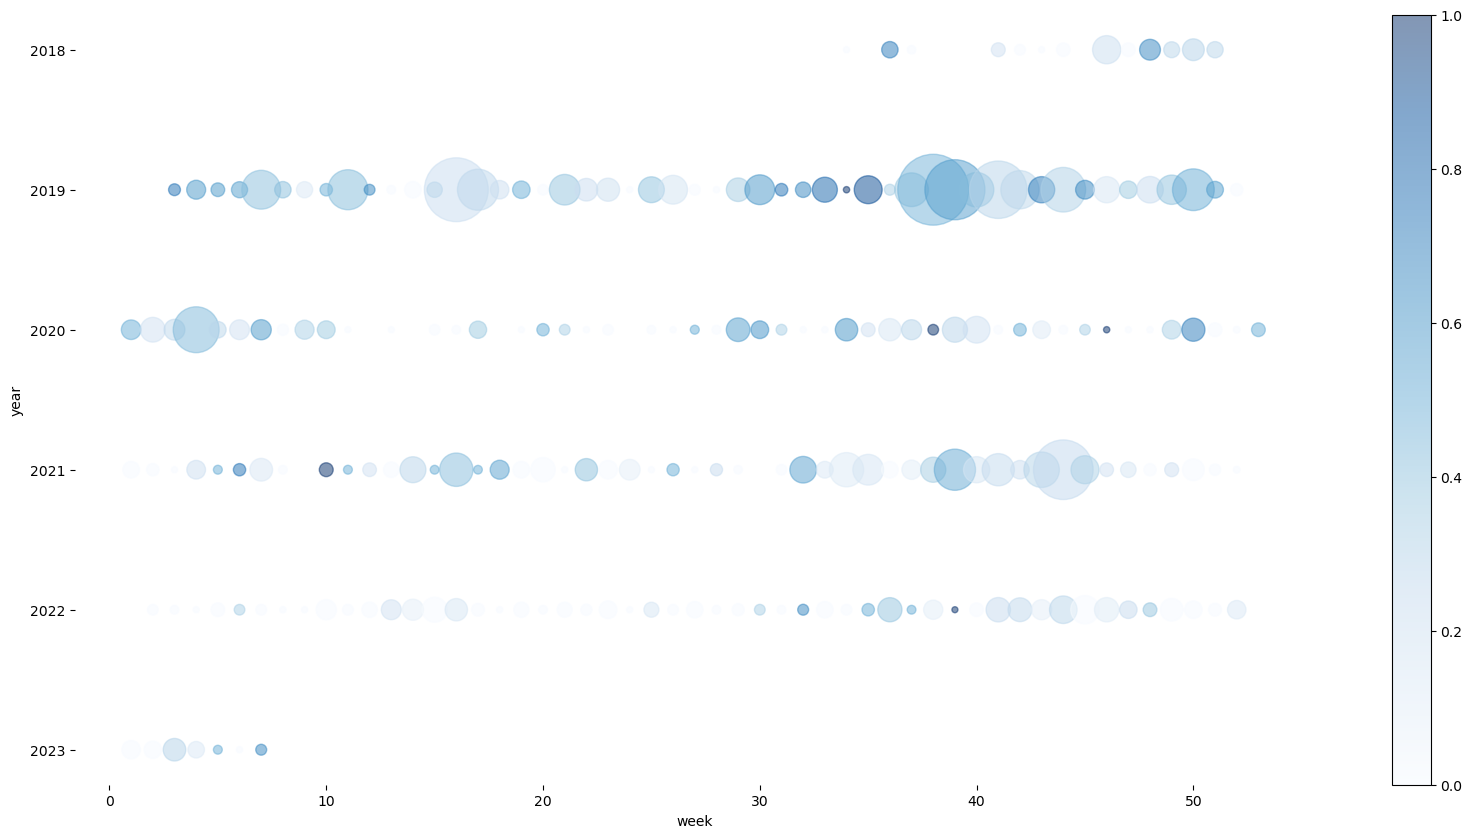

In [13]:
# This uses relative frequency 
ax = time_df.plot(y='year', 
                  x='week', 
                  kind='scatter', 
                  #marker='s', 
                  s=time_df.total_climate_tweets / time_df.total_tweets * 400000, # Multiplier makes the larger size around 2500 units
                  alpha=.5, 
                  c=time_df.high_engagement_climate_tweets / time_df.total_climate_tweets, 
                  cmap='Blues',
                  figsize=(20,10))

plt.gca().invert_yaxis()
sns.despine(left=True, bottom=True)


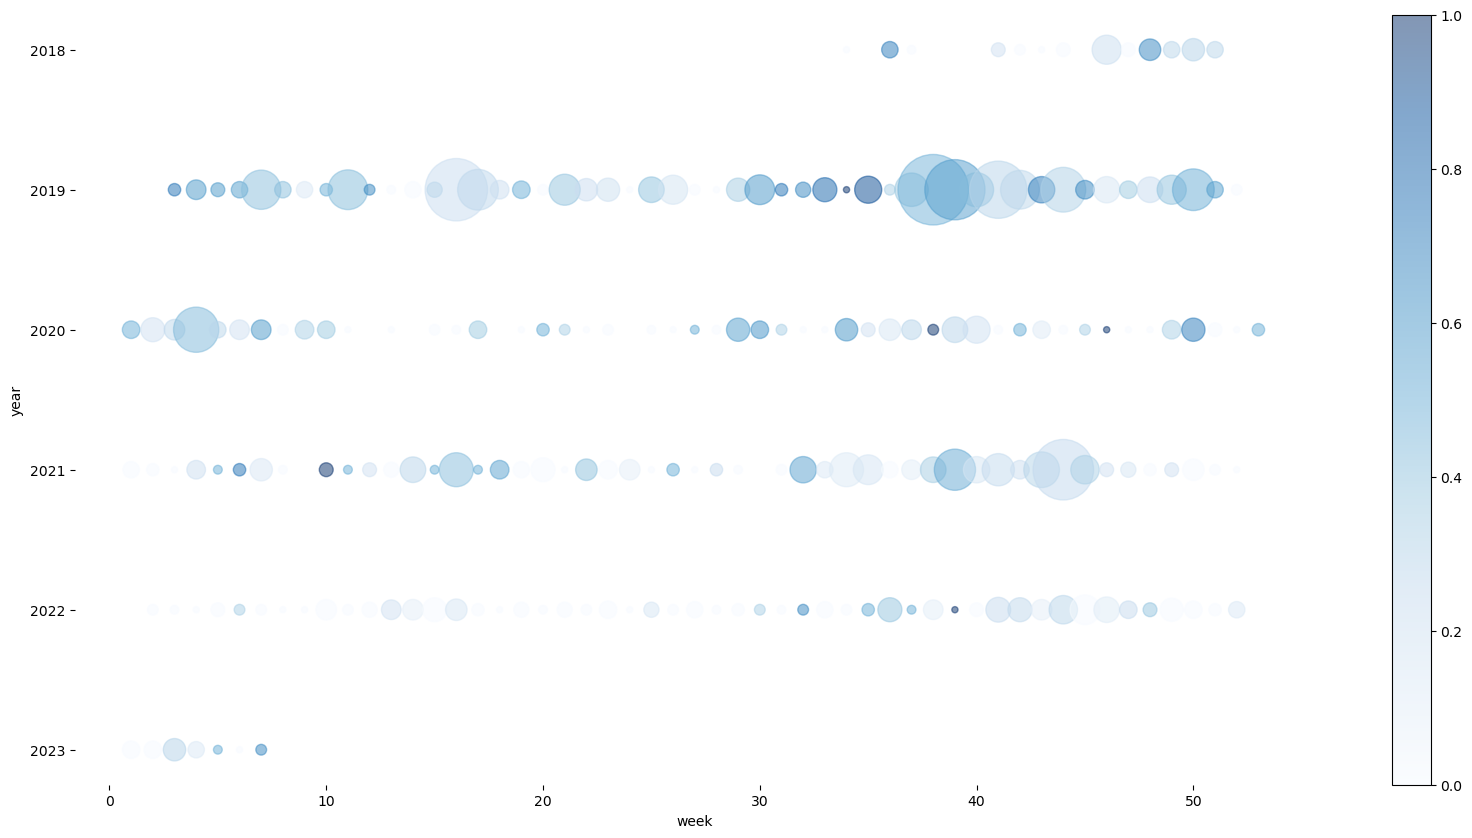

In [14]:
# This takes the absolute count of climate tweets – I think I will go with this, since the
# message is essentially the same and there's one less layer of complexity.
ax = time_df.plot(y='year', 
                  x='week', 
                  kind='scatter', 
                  #marker='s', 
                  s=time_df.total_climate_tweets * 20, # Multiplier is set to match the one above – top size is around 2500 units as well
                  alpha=.5, 
                  c=time_df.high_engagement_climate_tweets / time_df.total_climate_tweets, 
                  cmap='Blues',
                  figsize=(20,10))

plt.gca().invert_yaxis()
sns.despine(left=True, bottom=True)


In [15]:
# Saves the formatted dataframe to enhance it on d3.js
time_df.to_csv("viz.engagement-over-time/data.csv")

In [16]:
# Also saves the tweets so we can create a nice alert
df[df.classification.isin(['d', 'nd'])].to_csv("viz.engagement-over-time/tweets.csv")